## IMPORTING DATA

In [2]:
import pandas as pd

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
# Looking at the latest month available: 9/25 - 10/29

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [211002, 211009, 211016, 211023, 211030]
df = get_data(week_nums)

In [4]:
df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-09-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082
1,2021-09-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083
2,2021-09-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107
3,2021-09-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156
4,2021-09-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188


In [583]:
df.tail()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209879,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680
209880,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680
209881,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680
209882,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681
209883,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681


In [575]:
df.shape

(1049843, 12)

In [581]:
df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME'])['ENTRIES'].count().shape

(5025,)

In [582]:
df.groupby(['STATION', 'LINENAME'])['ENTRIES'].count().shape

(478,)

## RESETTING THE INDEX

In [5]:
df.index.is_unique

False

In [6]:
df1 = df.reset_index(drop=True)

In [7]:
df1.index.is_unique

True

In [8]:
df1.DATE.value_counts().sort_index()

09/25/2021    29961
09/26/2021    29873
09/27/2021    30388
09/28/2021    30070
09/29/2021    30000
09/30/2021    30024
10/01/2021    29895
10/02/2021    29882
10/03/2021    29854
10/04/2021    30020
10/05/2021    30102
10/06/2021    29919
10/07/2021    29961
10/08/2021    30029
10/09/2021    29914
10/10/2021    29907
10/11/2021    30227
10/12/2021    29962
10/13/2021    30056
10/14/2021    29961
10/15/2021    29970
10/16/2021    30047
10/17/2021    29854
10/18/2021    30094
10/19/2021    30057
10/20/2021    29925
10/21/2021    30024
10/22/2021    29983
10/23/2021    29926
10/24/2021    29854
10/25/2021    29964
10/26/2021    30322
10/27/2021    29936
10/28/2021    29858
10/29/2021    30024
Name: DATE, dtype: int64

## REMOVING SPACES FROM COLUMN NAMES

In [9]:
df1.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
df1.columns = df1.columns.str.strip()

df1.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
df1.shape

(1049843, 12)

## CHECKING NULL VALUES

In [12]:
#no nulls
df1.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049843 entries, 0 to 1049842
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   DATE_TIME  1049843 non-null  datetime64[ns]
 1   C/A        1049843 non-null  object        
 2   UNIT       1049843 non-null  object        
 3   SCP        1049843 non-null  object        
 4   STATION    1049843 non-null  object        
 5   LINENAME   1049843 non-null  object        
 6   DIVISION   1049843 non-null  object        
 7   DATE       1049843 non-null  object        
 8   TIME       1049843 non-null  object        
 9   DESC       1049843 non-null  object        
 10  ENTRIES    1049843 non-null  int64         
 11  EXITS      1049843 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 96.1+ MB


## REMOVING DUPLICATES


In [13]:
#The duplicates come from 2 turnstiles in ST. GEORGE and METROPOLITAN AV stations.

duplicates = (df1
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

duplicates.head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1041419,S101,R070,00-00-02,ST. GEORGE,2021-10-03 20:00:00,2
1041420,S101,R070,00-00-02,ST. GEORGE,2021-10-04 00:00:00,2
1041418,S101,R070,00-00-02,ST. GEORGE,2021-10-03 16:00:00,2
1041417,S101,R070,00-00-02,ST. GEORGE,2021-10-03 12:00:00,2
1041416,S101,R070,00-00-02,ST. GEORGE,2021-10-03 08:00:00,2
1041413,S101,R070,00-00-02,ST. GEORGE,2021-10-02 20:00:00,2
1041412,S101,R070,00-00-02,ST. GEORGE,2021-10-02 16:00:00,2
1041411,S101,R070,00-00-02,ST. GEORGE,2021-10-02 12:00:00,2
1041410,S101,R070,00-00-02,ST. GEORGE,2021-10-02 08:00:00,2
1041408,S101,R070,00-00-02,ST. GEORGE,2021-10-02 00:00:00,2


In [14]:
#ST. GEORGE station - saving the date_times of the duplicates 
dates_george = duplicates[(duplicates['STATION'] == 'ST. GEORGE') & (duplicates['ENTRIES'] == 2)]['DATE_TIME']
dates_george

1041419   2021-10-03 20:00:00
1041420   2021-10-04 00:00:00
1041418   2021-10-03 16:00:00
1041417   2021-10-03 12:00:00
1041416   2021-10-03 08:00:00
1041413   2021-10-02 20:00:00
1041412   2021-10-02 16:00:00
1041411   2021-10-02 12:00:00
1041410   2021-10-02 08:00:00
1041408   2021-10-02 00:00:00
1041369   2021-09-25 12:00:00
1041393   2021-09-29 12:00:00
1041404   2021-10-01 08:00:00
1041394   2021-09-29 16:00:00
1041402   2021-10-01 00:00:00
1041401   2021-09-30 20:00:00
1041400   2021-09-30 16:00:00
1041399   2021-09-30 12:00:00
1041398   2021-09-30 08:00:00
1041396   2021-09-30 00:00:00
1041395   2021-09-29 20:00:00
1041383   2021-09-27 20:00:00
1041376   2021-09-26 16:00:00
1041378   2021-09-27 00:00:00
1041375   2021-09-26 12:00:00
1041374   2021-09-26 08:00:00
1041380   2021-09-27 08:00:00
1041422   2021-10-04 08:00:00
1041381   2021-09-27 12:00:00
1041382   2021-09-27 16:00:00
1041377   2021-09-26 20:00:00
1041384   2021-09-28 00:00:00
1041372   2021-09-26 00:00:00
1041371   

In [15]:
#Pulling up those records in the main df for ST. GEORGE to identify the origin of the duplicates
george_dup_datetimes = ((df1["C/A"] == "S101") &
        (df1["UNIT"] == "R070") & 
        (df1["SCP"] == "00-00-02") & 
        (df1["STATION"] == "ST. GEORGE") &
        (df1["DATE_TIME"].isin(dates_george))
       )

df1[george_dup_datetimes].groupby(['DATE_TIME', 'DESC']).ENTRIES.count().head(20)

DATE_TIME            DESC      
2021-09-25 12:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-25 20:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-26 00:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-26 08:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-26 12:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-26 16:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-26 20:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-27 00:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-27 08:00:00  RECOVR AUD    1
                     REGULAR       1
2021-09-27 12:00:00  RECOVR AUD    1
                     REGULAR       1
Name: ENTRIES, dtype: int64

In [ ]:
# Can clearly see the duplicates are coming from the REGULAR and RECOVR AUD audits
# Now will check the METROPOLITAN AV station

In [16]:
# Saving the date_times of the duplicates 
dates_metr = duplicates[(duplicates['STATION'] == 'METROPOLITAN AV') & (duplicates['ENTRIES'] == 2)]['DATE_TIME']
dates_metr


479570   2021-10-24 05:00:00
Name: DATE_TIME, dtype: datetime64[ns]

In [17]:
#Pulling up those records in the main df for METROPOLITAN AV to identify the origin of the duplicates
metr_dup_datetimes = ((df["C/A"] == "N409") &
        (df["UNIT"] == "R268") & 
        (df["SCP"] == "00-00-01") & 
        (df["STATION"] == "METROPOLITAN AV") &
        (df["DATE_TIME"].isin(dates_metr))
       )
df[metr_dup_datetimes].groupby(['DATE_TIME', 'DESC']).ENTRIES.count().head(20)



DATE_TIME            DESC      
2021-10-24 05:00:00  RECOVR AUD    1
                     REGULAR       1
Name: ENTRIES, dtype: int64

In [39]:
# Same as with ST. GEORGE. Duplicates come from REGULAR and RECOVR AUD

In [18]:
#There are a total of 37 (36 and 1) duplicate entries that we need to remove.
len(dates_george) + len(dates_metr)


37

In [19]:
# Removing duplicate entries 
df1.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df1.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
#Succesfully removed the 37 duplicates: 1,049,843 - 37 = 1,049,806
df1.shape

(1049806, 12)

In [21]:
#Sanity check
duplicates = (df1
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

duplicates.head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-09-25 00:00:00,1
699700,R141,R031,00-03-00,34 ST-PENN STA,2021-10-17 08:00:00,1
699862,R141,R031,00-03-01,34 ST-PENN STA,2021-10-09 04:00:00,1
699863,R141,R031,00-03-01,34 ST-PENN STA,2021-10-09 08:00:00,1
699864,R141,R031,00-03-01,34 ST-PENN STA,2021-10-09 12:00:00,1
699865,R141,R031,00-03-01,34 ST-PENN STA,2021-10-09 16:00:00,1
699866,R141,R031,00-03-01,34 ST-PENN STA,2021-10-09 20:00:00,1
699867,R141,R031,00-03-01,34 ST-PENN STA,2021-10-10 00:00:00,1
699868,R141,R031,00-03-01,34 ST-PENN STA,2021-10-10 04:00:00,1
699869,R141,R031,00-03-01,34 ST-PENN STA,2021-10-10 08:00:00,1


## REMOVING ABNORMAL DATA

In [45]:
# REMOVING OUTLIERS

# What is a reasonable number of people a turntile can let in or let out in 4 hours?
# 1 person per second seems like a reasonable maximum threshold 
# which is 14400 per 4 hours


In [22]:
# Duplicating df1 for further analysis
df2 = df1

In [23]:
# Creating two columns for previous entries and exits in each row
df2[["prev_time", "prev_entries", "prev_exits"]] = (df2
                    .sort_values('DATE_TIME', ascending=True)
                    .groupby(["C/A", "UNIT", "SCP", "STATION", 'DATE'])["TIME", "ENTRIES", "EXITS"]
                     .apply(lambda group: group.shift(1)))
df2.head(10)

<ipython-input-23-7845ae5c81ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2[["prev_time", "prev_entries", "prev_exits"]] = (df2


,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0
1049837,2021-10-29 01:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,01:00:00,REGULAR,5554,680,NaN,NaN,NaN
1049836,2021-10-28 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,21:00:00,REGULAR,5554,679,17:00:00,5554.0,676.0
1049835,2021-10-28 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,17:00:00,REGULAR,5554,676,13:00:00,5554.0,667.0
1049834,2021-10-28 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,13:00:00,REGULAR,5554,667,09:00:00,5554.0,667.0
1049833,2021-10-28 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,09:00:00,REGULAR,5554,667,05:00:00,5554.0,667.0


In [24]:
# Dropping the rows with the missing values created from the shift above
#(874628, 15)
df2.dropna(subset=["prev_entries"], axis=0, inplace=True)
df2.head()
df2.shape

(874628, 15)

In [25]:
# Calculating the differences between the 4-hour ENTRIES audits for each turnstile

df2['4_hour_entries'] = df2['ENTRIES'] - df2['prev_entries']
df2.head(10)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0
1049836,2021-10-28 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,21:00:00,REGULAR,5554,679,17:00:00,5554.0,676.0,0.0
1049835,2021-10-28 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,17:00:00,REGULAR,5554,676,13:00:00,5554.0,667.0,0.0
1049834,2021-10-28 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,13:00:00,REGULAR,5554,667,09:00:00,5554.0,667.0,0.0
1049833,2021-10-28 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,09:00:00,REGULAR,5554,667,05:00:00,5554.0,667.0,0.0
1049832,2021-10-28 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,05:00:00,REGULAR,5554,667,01:00:00,5554.0,667.0,0.0


In [26]:
# Calculating the differences between the 4-hour EXIT audits for each turnstile

df2['4_hour_exits'] = df2['EXITS'] - df2['prev_exits']
df2.head(10)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0,1.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0,0.0
1049836,2021-10-28 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,21:00:00,REGULAR,5554,679,17:00:00,5554.0,676.0,0.0,3.0
1049835,2021-10-28 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,17:00:00,REGULAR,5554,676,13:00:00,5554.0,667.0,0.0,9.0
1049834,2021-10-28 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,13:00:00,REGULAR,5554,667,09:00:00,5554.0,667.0,0.0,0.0
1049833,2021-10-28 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,09:00:00,REGULAR,5554,667,05:00:00,5554.0,667.0,0.0,0.0
1049832,2021-10-28 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,05:00:00,REGULAR,5554,667,01:00:00,5554.0,667.0,0.0,0.0


## Checking reverse audits

In [27]:
# Seeing some negative 4-hour differences. Checking how many rows have this issue.

(df2[df2["ENTRIES"] < df2["prev_entries"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION", 'DATE_TIME'])
    .size())

C/A   UNIT  SCP       STATION          DATE_TIME          
A011  R080  01-03-00  57 ST-7 AV       2021-09-25 04:00:00    1
                                       2021-09-25 08:00:00    1
                                       2021-09-25 12:00:00    1
                                       2021-09-25 16:00:00    1
                                       2021-09-25 20:00:00    1
                                                             ..
R730  R431  00-00-04  EASTCHSTER/DYRE  2021-10-29 09:00:00    1
                                       2021-10-29 13:00:00    1
                                       2021-10-29 17:00:00    1
                                       2021-10-29 21:00:00    1
S101  R070  00-00-02  ST. GEORGE       2021-09-30 04:00:00    1
Length: 8225, dtype: int64

In [28]:
# Pulling up a specific record from the above slice to see if the audits are being reported in reverse.

df2[(df2["C/A"] == "A011") & 
(df2["UNIT"] == "R080") & 
(df2["SCP"] == "01-03-00") & 
(df2["STATION"] == "57 ST-7 AV") &
(df2["DATE"] == '09/25/2021')]


,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits
1643,2021-09-25 20:00:00,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/25/2021,20:00:00,REGULAR,885570461,489467066,16:00:00,885570551.0,489467337.0,-90.0,-271.0
1642,2021-09-25 16:00:00,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/25/2021,16:00:00,REGULAR,885570551,489467337,12:00:00,885570615.0,489467709.0,-64.0,-372.0
1641,2021-09-25 12:00:00,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/25/2021,12:00:00,REGULAR,885570615,489467709,08:00:00,885570649.0,489467933.0,-34.0,-224.0
1640,2021-09-25 08:00:00,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/25/2021,08:00:00,REGULAR,885570649,489467933,04:00:00,885570662.0,489467993.0,-13.0,-60.0
1639,2021-09-25 04:00:00,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,09/25/2021,04:00:00,REGULAR,885570662,489467993,00:00:00,885570678.0,489468023.0,-16.0,-30.0


In [ ]:
# Indeed. The data is reported in reverse. Will turn the negative numbers into positives in the next step. 



## Updating reverse audits

In [29]:
import numpy as np

In [30]:
# Reversing the backwards audits for entries

def adjust(row):
    num = row['4_hour_entries']
    if num < 0:
        num = - num
    return num

df2[['4_hour_entries']] = df2.apply(adjust, axis=1)
df2

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0,1.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2021-09-25 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,20:00:00,REGULAR,7641437,2615217,16:00:00,7641265.0,2615188.0,172.0,29.0
4,2021-09-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,12:00:00,7641135.0,2615156.0,130.0,32.0
3,2021-09-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,08:00:00,7641100.0,2615107.0,35.0,49.0
2,2021-09-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,04:00:00,7641091.0,2615083.0,9.0,24.0


In [31]:
# Reversing the backwards audits for exits


def adjust(row):
    num = row['4_hour_exits']
    if num < 0:
        num = - num
    return num

df2[['4_hour_exits']] = df2.apply(adjust, axis=1)
df2

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0,1.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2021-09-25 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,20:00:00,REGULAR,7641437,2615217,16:00:00,7641265.0,2615188.0,172.0,29.0
4,2021-09-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,12:00:00,7641135.0,2615156.0,130.0,32.0
3,2021-09-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,08:00:00,7641100.0,2615107.0,35.0,49.0
2,2021-09-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,04:00:00,7641091.0,2615083.0,9.0,24.0


In [32]:
# Creating total traffic column for entries and exits

df2['total_traffic'] = df2['4_hour_entries'] + df2['4_hour_exits']
df2.head(10)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits,total_traffic
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0,0.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0,1.0,1.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0,0.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0,0.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0,0.0,0.0
1049836,2021-10-28 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,21:00:00,REGULAR,5554,679,17:00:00,5554.0,676.0,0.0,3.0,3.0
1049835,2021-10-28 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,17:00:00,REGULAR,5554,676,13:00:00,5554.0,667.0,0.0,9.0,9.0
1049834,2021-10-28 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,13:00:00,REGULAR,5554,667,09:00:00,5554.0,667.0,0.0,0.0,0.0
1049833,2021-10-28 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,09:00:00,REGULAR,5554,667,05:00:00,5554.0,667.0,0.0,0.0,0.0
1049832,2021-10-28 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/28/2021,05:00:00,REGULAR,5554,667,01:00:00,5554.0,667.0,0.0,0.0,0.0


## Updating outliers

In [33]:
# Maximum threshold: a turnstile can let in or out one person per second
# which is 60 people a minute, 3600 people an hour, 14400 people in 4 hours.

# If a number is higher than the threshold of 14400, replace it with a NaN.

def adjust_abnorm(row):
    num = row['total_traffic']
    if num > 14400:
        num = np.nan
    return num

df2['total_traffic_2'] = df2.apply(adjust_abnorm, axis=1)
df2

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits,total_traffic,total_traffic_2
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0,0.0,0.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0,1.0,1.0,1.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0,0.0,0.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0,0.0,0.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2021-09-25 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,20:00:00,REGULAR,7641437,2615217,16:00:00,7641265.0,2615188.0,172.0,29.0,201.0,201.0
4,2021-09-25 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,12:00:00,7641135.0,2615156.0,130.0,32.0,162.0,162.0
3,2021-09-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,08:00:00,7641100.0,2615107.0,35.0,49.0,84.0,84.0
2,2021-09-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,04:00:00,7641091.0,2615083.0,9.0,24.0,33.0,33.0


In [34]:
# Filling any NaN's from the previous step with a mean of each group
# And creating a new column for the updated entries and exits. 

df2['entries_exits'] = (df2.groupby(["C/A", "UNIT", "SCP", "STATION", 'DATE'])['total_traffic_2']
 .transform(lambda x: x.fillna(x.mean())))

df2.head()


,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,4_hour_entries,4_hour_exits,total_traffic,total_traffic_2,entries_exits
1049842,2021-10-29 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,17:00:00,5554.0,681.0,0.0,0.0,0.0,0.0,0.0
1049841,2021-10-29 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,13:00:00,5554.0,680.0,0.0,1.0,1.0,1.0,1.0
1049840,2021-10-29 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,09:00:00,5554.0,680.0,0.0,0.0,0.0,0.0,0.0
1049839,2021-10-29 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,05:00:00,5554.0,680.0,0.0,0.0,0.0,0.0,0.0
1049838,2021-10-29 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,01:00:00,5554.0,680.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Dropping the old columns

df2.drop(columns=['4_hour_entries', '4_hour_exits', 'total_traffic', 'total_traffic_2'], inplace=True)



In [36]:
df2.sort_values('entries_exits', ascending=False).head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,prev_time,prev_entries,prev_exits,entries_exits
334341,2021-10-05 10:22:21,PTH13,R541,00-04-04,THIRTY ST,1,PTH,10/05/2021,10:22:21,REGULAR,22,19,06:17:26,10629.0,1429.0,12017.0
757223,2021-10-18 08:39:09,PTH19,R549,02-00-08,NEWARK C,1,PTH,10/18/2021,08:39:09,REGULAR,7969,760,08:28:12,60.0,2.0,8667.0
757224,2021-10-18 09:12:11,PTH19,R549,02-00-08,NEWARK C,1,PTH,10/18/2021,09:12:11,REGULAR,90759,11990,08:39:09,7969.0,760.0,8667.0
588116,2021-10-15 20:00:00,R249,R179,01-00-09,86 ST,456,IRT,10/15/2021,20:00:00,REGULAR,2384645,23293046,12:00:00,2384321.0,23290698.0,2672.0
265275,2021-10-05 20:00:00,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,10/05/2021,20:00:00,REGULAR,2216167,10001097,16:00:00,2216098.0,9998547.0,2619.0


## IMPORTING COLLEGE ENROLLMENT DATABASE

In [37]:
# Source: https://www.collegeraptor.com/college-rankings/details/TotalEnrollment/State/NY

from sqlalchemy import create_engine
engine = create_engine("sqlite:///colleges.db") 

In [38]:
engine.table_names()

<ipython-input-38-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['top20']

In [294]:
df_colleges_data = pd.read_sql('SELECT * FROM top20;', engine)
df_colleges = df_colleges_data.iloc[1: , :]
# df_colleges.head(12)
df_colleges.loc[4]['name'] = "St. John's University"
df_colleges.loc[6]['name'] = "CUNY Baruch College"
df_colleges.loc[8]['name'] = "CUNY NYC College of Technology"
df_colleges.loc[10]['name'] = 'CUNY John Jay College'
df_colleges

,name,enrollment_2022
1,New York University,52885
2,Columbia University,31456
3,CUNY Hunter College,23193
4,St. John's University,21718
5,CUNY Queens College,19923
6,CUNY Baruch College,18679
7,CUNY Brooklyn College,17811
8,CUNY NYC College of Technology,17036
9,Fordham University,16972
10,CUNY John Jay College,15880


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

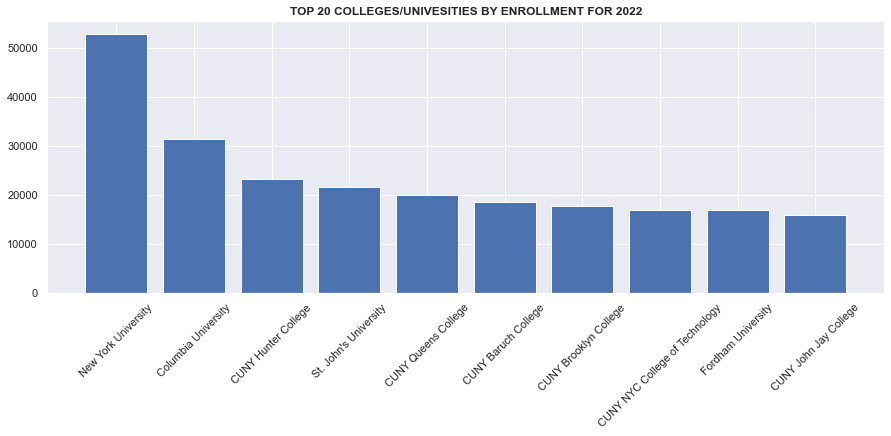

In [326]:
# Plotting the top 20 colleges by enrollment

college_names = df_colleges.iloc[0:10].name.tolist()
college_enrol = df_colleges.iloc[0:10]['enrollment_2022'].tolist()

# top_10_names = station_avg_daily.iloc[0:10].STATION.tolist()
# top_10_traffic = station_avg_daily.iloc[0:10]['entries_exits'].tolist()

plt.figure(figsize=(15,5))
plt.bar(college_names, college_enrol)
plt.title('TOP 20 COLLEGES/UNIVESITIES BY ENROLLMENT FOR 2022', fontweight = 'bold')
# plt.ylabel('TOTAL ENROLLMENT FOR 2022', fontweight = 'bold')
# plt.xlabel('COLLEGE/UNIVERSITY', fontweight = 'bold')
plt.text(-0.25, 52885, '52,885', ha='center', va='bottom', size=10)
plt.text(0.75, 27000, '26,856', ha='center', va='bottom', size=10)
plt.text(1.75, 22600, '22,423', ha='center', va='bottom', size=10)
plt.text(2.9, 24300, '24,225', ha='center', va='bottom', size=10)
plt.text(3.9, 14500, '14,358', ha='center', va='bottom', size=10)
plt.text(4.9, 10000, '9,694', ha='center', va='bottom', size=10)
plt.text(6.1, 10500, '10,331', ha='center', va='bottom', size=10)
plt.text(7.1, 6000, '5,875', ha='center', va='bottom', size=10)
plt.text(8.3, 25400, '25,265', ha='center', va='bottom', size=10)
plt.text(9.3, 20300, '20,173', ha='center', va='bottom', size=10)
plt.text(10.3, 17900, '17,739', ha='center', va='bottom', size=10)

plt.xticks(rotation=45);



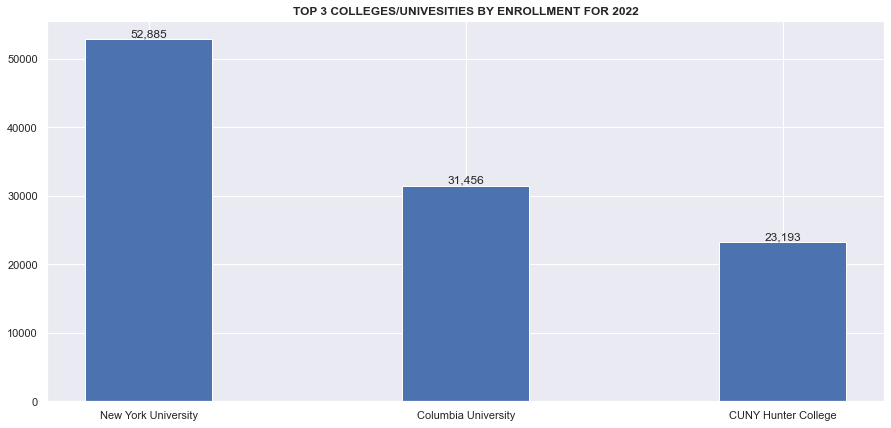

In [349]:
# Plotting the top 20 colleges by enrollment

college_names_2 = df_colleges.iloc[0:3].name.tolist()
college_enrol_2 = df_colleges.iloc[0:3]['enrollment_2022'].tolist()

# top_10_names = station_avg_daily.iloc[0:10].STATION.tolist()
# top_10_traffic = station_avg_daily.iloc[0:10]['entries_exits'].tolist()

plt.figure(figsize=(15,7))
plt.bar(college_names_2, college_enrol_2, width=0.4)
plt.title('TOP 3 COLLEGES/UNIVESITIES BY ENROLLMENT FOR 2022', fontweight = 'bold')
# plt.ylabel('TOTAL ENROLLMENT FOR 2022', fontweight = 'bold')
# plt.xlabel('COLLEGE/UNIVERSITY', fontweight = 'bold')
plt.text(0, 52900, '52,885', ha='center', va='bottom', size=12)
plt.text(1, 31600, '31,456', ha='center', va='bottom', size=12)
plt.text(2, 23300, '23,193', ha='center', va='bottom', size=12)

plt.xticks(rotation=0);




In [375]:
top_3 = df_colleges.iloc[0:3]
top_3['Male'] = [0.424, 0.52, 0.356]
top_3['Female'] = [0.576, 0.48, 0.644]
top_3


<ipython-input-375-e7cf9580a56a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3['Male'] = [0.424, 0.52, 0.356]
<ipython-input-375-e7cf9580a56a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3['Female'] = [0.576, 0.48, 0.644]


,name,enrollment_2022,Male,Female
1,New York University,52885,0.424,0.576
2,Columbia University,31456,0.520,0.480
3,CUNY Hunter College,23193,0.356,0.644


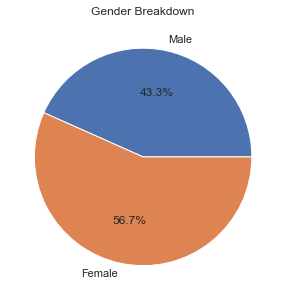

In [388]:
male_avg = top_3['Male'].mean()
female_avg = top_3['Female'].mean()
my_list = [male_avg, female_avg]
my_labels = ['Male', 'Female']
plt.pie(my_list, labels = my_labels, autopct='%1.1f%%')
plt.title('Gender Breakdown');

## AGGREGATING DATA FOR PLOTTING

In [467]:
# Creating a sum of entries and exits per station per linename per day

station_daily = df2.groupby(["STATION", "LINENAME", "DATE"])['entries_exits'].sum().reset_index()
station_daily.sort_values('entries_exits', ascending=False)
station_daily.rename(columns = {'entries_exits':'TRAFFIC'}, inplace = True)
station_daily


,STATION,LINENAME,DATE,TRAFFIC
0,1 AV,L,09/25/2021,19500.0
1,1 AV,L,09/26/2021,15880.0
2,1 AV,L,09/27/2021,22732.0
3,1 AV,L,09/28/2021,23407.0
4,1 AV,L,09/29/2021,24491.0
...,...,...,...,...
16700,ZEREGA AV,6,10/25/2021,3071.0
16701,ZEREGA AV,6,10/26/2021,2477.0
16702,ZEREGA AV,6,10/27/2021,2953.0
16703,ZEREGA AV,6,10/28/2021,3202.0


In [ ]:
# Finding daily average per station

In [468]:
station_daily_avg = station_daily.groupby(['STATION', 'LINENAME'])['TRAFFIC'].mean().reset_index().sort_values('TRAFFIC', ascending=False)
station_daily_avg['TRAFFIC']

,STATION,LINENAME,TRAFFIC
312,GRD CNTRL-42 ST,4567S,86353.257143
89,34 ST-HERALD SQ,BDFMNQRW,82066.685714
102,42 ST-PORT AUTH,ACENQRS1237W,59672.457143
93,34 ST-PENN STA,ACE,57298.737143
289,FLUSHING-MAIN,7,52675.057143
...,...,...,...
204,BEACH 98 ST,AS,538.457143
450,TOMPKINSVILLE,1,366.057143
197,BEACH 105 ST,AS,276.800000
221,BROAD CHANNEL,AS,183.714286


In [475]:
# Remove decimals

import math

station_daily_avg['TRAFFIC'] = station_daily_avg['TRAFFIC'].apply(np.floor)
station_daily_avg

,STATION,LINENAME,TRAFFIC
312,GRD CNTRL-42 ST,4567S,86353.0
89,34 ST-HERALD SQ,BDFMNQRW,82066.0
102,42 ST-PORT AUTH,ACENQRS1237W,59672.0
93,34 ST-PENN STA,ACE,57298.0
289,FLUSHING-MAIN,7,52675.0
...,...,...,...
204,BEACH 98 ST,AS,538.0
450,TOMPKINSVILLE,1,366.0
197,BEACH 105 ST,AS,276.0
221,BROAD CHANNEL,AS,183.0


## Finding top stations per campus

In [482]:
# Finding top stations per campus by daily average

nyu_stations_village = ['14 ST-UNION SQ', 'W 4 ST-WASH SQ', '8 ST-NYU', "B'WAY-LAFAYETTE", 'CHRISTOPHER ST']
#14st-union sq (L, N,Q,R,W, 4,5,6)
nyu_stations_brooklyn = ['HOYT-SCHER', 'JAY ST-METROTEC', 'BOROUGH HALL', 'HOYT ST', 'DEKALB AV']
#Borough Hall (4,5) and Borough Hall (2,3), Metrotec (A,C,F) and (R)
columbia_stations = ['116 ST-COLUMBIA', '116 ST', '125 ST'] #116 (B,C) and 116 (2,3)
hunter_stations = ['68ST-HUNTER CO', 'LEXINGTON AV/63', '72 ST-2 AVE']
#23 st (6), 28th st (6), 116 (B,C), 125 ST (4,5,6)

In [520]:
#NUY village stations
df_nyu_stations_village = station_daily_avg[station_daily_avg['STATION'].isin(nyu_stations_village)]
df_nyu_stations_village = df_nyu_stations_village.sort_values('TRAFFIC', ascending=False)
df_nyu_stations_village

,STATION,LINENAME,TRAFFIC
28,14 ST-UNION SQ,LNQR456W,52155.0
460,W 4 ST-WASH SQ,ABCDEFM,34365.0
27,14 ST-UNION SQ,456LNQRW,26856.0
189,B'WAY-LAFAYETTE,BDFQ6,22423.0
247,CHRISTOPHER ST,1,12646.0
150,8 ST-NYU,NRW,10807.0


In [521]:
df_nyu_stations_brooklyn = station_daily_avg[station_daily_avg['STATION'].isin(nyu_stations_brooklyn)]
df_nyu_stations_brooklyn = df_nyu_stations_brooklyn.sort_values('TRAFFIC', ascending=False)
df_nyu_stations_brooklyn

,STATION,LINENAME,TRAFFIC
335,JAY ST-METROTEC,ACF,24225.0
214,BOROUGH HALL,2345R,19005.0
268,DEKALB AV,BDNQR,14358.0
326,HOYT-SCHER,ACG,9694.0
269,DEKALB AV,L,6948.0
325,HOYT ST,23,6598.0
336,JAY ST-METROTEC,R,2641.0
215,BOROUGH HALL,R2345,1844.0


In [501]:
df_columbia_stations = station_daily_avg[station_daily_avg['STATION'].isin(columbia_stations)]
df_columbia_stations.sort_values('TRAFFIC', ascending=False)

,STATION,LINENAME,TRAFFIC
19,125 ST,ACBD,24580.0
18,125 ST,456,24578.0
12,116 ST,6,12413.0
14,116 ST-COLUMBIA,1,10331.0
17,125 ST,23,9732.0
11,116 ST,23,7726.0
16,125 ST,1,7251.0
13,116 ST,BC,5875.0


In [480]:
df_hunter_stations = station_daily_avg[station_daily_avg['STATION'].isin(hunter_stations)]
df_hunter_stations.sort_values('TRAFFIC', ascending=False)[0:3]

,STATION,LINENAME,TRAFFIC
140,72 ST-2 AVE,Q,25265.0
132,68ST-HUNTER CO,6,20173.0
356,LEXINGTON AV/63,F,17739.0


In [507]:
#Top stations
station_list = ['W 4 ST-WASH SQ', '14 ST-UNION SQ', "B'WAY-LAFAYETTE", 'JAY ST-METROTEC', 'DEKALB AV', 'BOROUGH HALL', '116 ST-COLUMBIA', '116 ST', '125 ST', '72 ST-2 AVE', '68ST-HUNTER CO', 'LEXINGTON AV/63']


In [510]:
# Selecting top stations for STATION DAILY CAMPUS

station_daily_campus = station_daily[station_daily['STATION'].isin(station_list)]
station_daily_campus

#daily_station_select[daily_station_select['STATION'] == "B’WAY-LAFAYETTE"]['LINENAME'].unique()




# nyu_village_stations = ['14 ST-UNION SQ', 'W 4 ST-WASH SQ', '8 ST-NYU', "B'WAY-LAFAYETTE", 'CHRISTOPHER ST']
# #14st-union sq (456LNQRW)
# nyu_brooklyn_stations = ['HOYT-SCHER', 'JAY ST-METROTEC', 'BOROUGH HALL', 'HOYT ST', 'DEKALB AV']
# #Borough Hall (4,5) and Borough Hall (2,3), Metrotec (A,C,F) and (R)
# columbia_stations = ['116 ST-COLUMBIA', '116 ST'] #116 (B,C) and 116 (2,3)
# hunter_stations = ['68ST-HUNTER CO', 'LEXINGTON AV/63', '72 ST-2 AVE']
# #23 st (6), 28th st (6), 116 (B,C), 125 ST (4,5,6)

station_daily_campus[station_daily_campus['STATION']=='BOROUGH HALL'].sort_values('TRAFFIC', ascending=False)

,STATION,LINENAME,DATE,TRAFFIC
7523,BOROUGH HALL,2345R,10/28/2021,25179.0
7522,BOROUGH HALL,2345R,10/27/2021,25063.0
7515,BOROUGH HALL,2345R,10/20/2021,24932.0
7509,BOROUGH HALL,2345R,10/14/2021,24438.0
7516,BOROUGH HALL,2345R,10/21/2021,24426.0
...,...,...,...,...
7546,BOROUGH HALL,R2345,10/16/2021,1442.0
7547,BOROUGH HALL,R2345,10/17/2021,1262.0
7554,BOROUGH HALL,R2345,10/24/2021,1212.0
7539,BOROUGH HALL,R2345,10/09/2021,877.0


## FILTERED DAILY STATION

In [511]:
# Removing duplicate lines from daily station count


#station_daily_campus[station_daily_campus['STATION'] == 'LEXINGTON AV/63']['LINENAME'].unique()


index_remove_1 = station_daily_campus.index[(station_daily_campus['STATION'] == '14 ST-UNION SQ') & (station_daily_campus['LINENAME'] != '456LNQRW')].tolist()
station_daily_campus.drop(index_remove_1, inplace=True)

index_remove_2 = station_daily_campus.index[(station_daily_campus['STATION'] == 'JAY ST-METROTEC') & (station_daily_campus['LINENAME'] == 'R')].tolist()
station_daily_campus.drop(index_remove_2, inplace=True)

index_remove_3 = station_daily_campus.index[(station_daily_campus['STATION'] == 'DEKALB AV') & (station_daily_campus['LINENAME'] == 'L')].tolist()
station_daily_campus.drop(index_remove_3, inplace=True)

index_remove_4 = station_daily_campus.index[(station_daily_campus['STATION'] == 'BOROUGH HALL') & (station_daily_campus['LINENAME'] != '2345R')].tolist()
station_daily_campus.drop(index_remove_4, inplace=True)

index_remove_5 = station_daily_campus.index[(station_daily_campus['STATION'] == '116 ST') & (station_daily_campus['LINENAME'] != 'BC')].tolist()
station_daily_campus.drop(index_remove_5, inplace=True)

index_remove_6 = station_daily_campus.index[(station_daily_campus['STATION'] == '125 ST') & (station_daily_campus['LINENAME'] != 'ACBD')].tolist()
station_daily_campus.drop(index_remove_6, inplace=True)

station_daily_campus


/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,STATION,LINENAME,DATE,TRAFFIC
455,116 ST,BC,09/25/2021,3902.0
456,116 ST,BC,09/26/2021,3346.0
457,116 ST,BC,09/27/2021,6308.0
458,116 ST,BC,09/28/2021,6669.0
459,116 ST,BC,09/29/2021,6861.0
...,...,...,...,...
16105,W 4 ST-WASH SQ,ABCDEFM,10/25/2021,32996.0
16106,W 4 ST-WASH SQ,ABCDEFM,10/26/2021,30935.0
16107,W 4 ST-WASH SQ,ABCDEFM,10/27/2021,38935.0
16108,W 4 ST-WASH SQ,ABCDEFM,10/28/2021,39850.0


In [512]:
# Selecting top stations for STATION DAILY AVG CAMPUS

station_daily_campus_avg = station_daily_avg[station_daily_avg['STATION'].isin(station_list)]
station_daily_campus_avg




,STATION,LINENAME,TRAFFIC
28,14 ST-UNION SQ,LNQR456W,52155.0
460,W 4 ST-WASH SQ,ABCDEFM,34365.0
27,14 ST-UNION SQ,456LNQRW,26856.0
140,72 ST-2 AVE,Q,25265.0
19,125 ST,ACBD,24580.0
18,125 ST,456,24578.0
335,JAY ST-METROTEC,ACF,24225.0
189,B'WAY-LAFAYETTE,BDFQ6,22423.0
132,68ST-HUNTER CO,6,20173.0
214,BOROUGH HALL,2345R,19005.0


## FILTERED DAILY AVERAGE


In [522]:
# Removing duplicate lines from STATION DAILY AVG CAMPUS


index_remove_7 = station_daily_campus_avg.index[(station_daily_campus_avg['STATION'] == '14 ST-UNION SQ') & (station_daily_campus_avg['LINENAME'] != '456LNQRW')].tolist()
station_daily_campus_avg.drop(index_remove_7, inplace=True)

index_remove_8 = station_daily_campus_avg.index[(station_daily_campus_avg['STATION'] == 'JAY ST-METROTEC') & (station_daily_campus_avg['LINENAME'] == 'R')].tolist()
station_daily_campus_avg.drop(index_remove_8, inplace=True)

index_remove_9 = station_daily_campus_avg.index[(station_daily_campus_avg['STATION'] == 'DEKALB AV') & (station_daily_campus_avg['LINENAME'] == 'L')].tolist()
station_daily_campus_avg.drop(index_remove_9, inplace=True)

index_remove_10 = station_daily_campus_avg.index[(station_daily_campus_avg['STATION'] == 'BOROUGH HALL') & (station_daily_campus_avg['LINENAME'] != '2345R')].tolist()
station_daily_campus_avg.drop(index_remove_10, inplace=True)

index_remove_11 = station_daily_campus_avg.index[(station_daily_campus_avg['STATION'] == '116 ST') & (station_daily_campus_avg['LINENAME'] != 'BC')].tolist()
station_daily_campus_avg.drop(index_remove_11, inplace=True)

index_remove_12 = station_daily_campus_avg.index[(station_daily_campus_avg['STATION'] == '125 ST') & (station_daily_campus_avg['LINENAME'] != 'ACBD')].tolist()
station_daily_campus_avg.drop(index_remove_12, inplace=True)

station_daily_campus_avg['COLLEGE'] = ['NYU Village', 'NYU Village', 'Hunter College', 'Columbia University', 'NYU Brooklyn', 'NYU Village', 'Hunter College', 'NYU Brooklyn', 'Hunter College', 'NYU Brooklyn', 'Columbia University', 'Columbia University']


/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-522-59511edc2cdc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_campus_avg['COLLEGE'] = ['NYU Village', 'NYU Village', 'Hunter College', 'Columbia University', 'NYU Brooklyn', 'NYU Village', 'Hunter College', 'NYU Brooklyn', 'Hunter College', 'NYU Brooklyn', 'Columbia University', 'Columbia University']


,STATION,LINENAME,TRAFFIC,COLLEGE
460,W 4 ST-WASH SQ,ABCDEFM,34365.0,NYU Village
27,14 ST-UNION SQ,456LNQRW,26856.0,NYU Village
140,72 ST-2 AVE,Q,25265.0,Hunter College
19,125 ST,ACBD,24580.0,Columbia University
335,JAY ST-METROTEC,ACF,24225.0,NYU Brooklyn
189,B'WAY-LAFAYETTE,BDFQ6,22423.0,NYU Village
132,68ST-HUNTER CO,6,20173.0,Hunter College
214,BOROUGH HALL,2345R,19005.0,NYU Brooklyn
356,LEXINGTON AV/63,F,17739.0,Hunter College
268,DEKALB AV,BDNQR,14358.0,NYU Brooklyn


In [616]:
station_daily_campus_avg_sorted = station_daily_campus_avg.sort_values(['COLLEGE', 'TRAFFIC'], ascending=False)
station_daily_campus_avg_sorted['POP'] = [52885, 52885, 52885, 52884, 52884, 52884, 23193, 23193, 23193, 31456, 31456, 31456]
station_daily_campus_avg_sorted.sort_values(['POP', 'COLLEGE', 'TRAFFIC'], ascending=False)


,STATION,LINENAME,TRAFFIC,COLLEGE,POP
460,W 4 ST-WASH SQ,ABCDEFM,34365.0,NYU Village,52885
27,14 ST-UNION SQ,456LNQRW,26856.0,NYU Village,52885
189,B'WAY-LAFAYETTE,BDFQ6,22423.0,NYU Village,52885
335,JAY ST-METROTEC,ACF,24225.0,NYU Brooklyn,52884
214,BOROUGH HALL,2345R,19005.0,NYU Brooklyn,52884
268,DEKALB AV,BDNQR,14358.0,NYU Brooklyn,52884
19,125 ST,ACBD,24580.0,Columbia University,31456
14,116 ST-COLUMBIA,1,10331.0,Columbia University,31456
13,116 ST,BC,5875.0,Columbia University,31456
140,72 ST-2 AVE,Q,25265.0,Hunter College,23193


## AVERAGE TRAFFIC BY DAY OF WEEK

In [517]:
station_daily_campus['weekday_num'] = pd.to_datetime(station_daily_campus['DATE']).dt.dayofweek
station_daily_campus

station_daily_campus_1 = station_daily_campus.groupby(['STATION', 'weekday_num'])['TRAFFIC'].mean().reset_index()
station_daily_campus_1

<ipython-input-517-4a63165a5c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_campus['weekday_num'] = pd.to_datetime(station_daily_campus['DATE']).dt.dayofweek


,STATION,weekday_num,TRAFFIC
0,116 ST,0,6214.2
1,116 ST,1,6711.0
2,116 ST,2,7045.2
3,116 ST,3,6986.4
4,116 ST,4,7089.2
...,...,...,...
79,W 4 ST-WASH SQ,2,38085.0
80,W 4 ST-WASH SQ,3,39154.0
81,W 4 ST-WASH SQ,4,39475.8
82,W 4 ST-WASH SQ,5,32065.0


In [518]:
station_daily_campus_2 = station_daily_campus_1.groupby(['weekday_num'])['TRAFFIC'].mean().reset_index()

station_daily_campus_2

,weekday_num,TRAFFIC
0,0,21497.691667
1,1,23285.516667
2,2,24256.208333
3,3,24673.433333
4,4,23785.283333
5,5,14436.050000
6,6,11100.075000


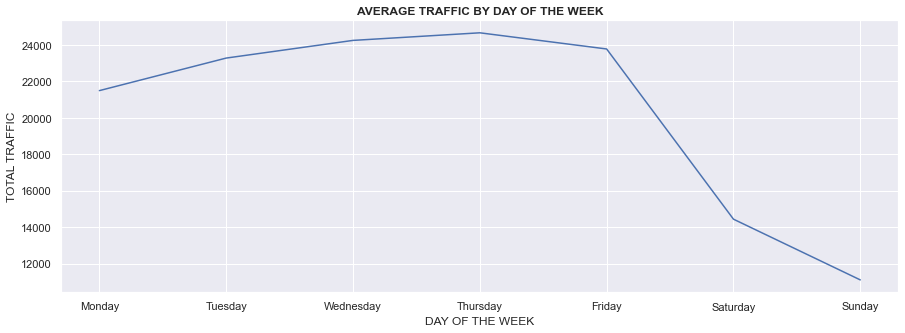

In [572]:

sns.lineplot(data=station_daily_campus_2, x='weekday_num', y = 'TRAFFIC')
plt.title('AVERAGE TRAFFIC BY DAY OF THE WEEK', fontweight = 'bold')
plt.xlabel('DAY OF THE WEEK')
plt.ylabel('TOTAL TRAFFIC')
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

## AVERAGE DAILY TRAFFIC BY STATION

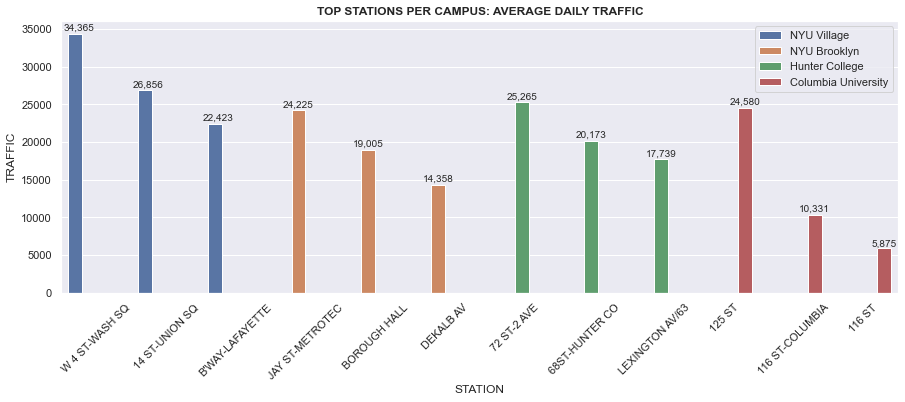

In [556]:

sns.set(rc={"figure.figsize":(15, 5)})


sns.barplot(data=station_daily_campus_avg_sorted, x='STATION', y = 'TRAFFIC', hue='COLLEGE').set_title('TOP STATIONS PER CAMPUS: AVERAGE DAILY TRAFFIC', fontweight = 'bold')
plt.xticks(rotation=45)

plt.text(-0.25, 34500, '34,365', ha='center', va='bottom', size=10)
plt.text(0.75, 27000, '26,856', ha='center', va='bottom', size=10)
plt.text(1.75, 22600, '22,423', ha='center', va='bottom', size=10)
plt.text(2.9, 24300, '24,225', ha='center', va='bottom', size=10)
plt.text(3.9, 19100, '19,005', ha='center', va='bottom', size=10)
plt.text(4.9, 14500, '14,358', ha='center', va='bottom', size=10)
plt.text(6.1, 25400, '25,265', ha='center', va='bottom', size=10)
plt.text(7.1, 20300, '20,173', ha='center', va='bottom', size=10)
plt.text(8.1, 17800, '17,739', ha='center', va='bottom', size=10)
plt.text(9.3, 24700, '24,580', ha='center', va='bottom', size=10)
plt.text(10.3, 10500, '10,331', ha='center', va='bottom', size=10)
plt.text(11.3, 5900, '5,875', ha='center', va='bottom', size=10)

plt.legend(loc='upper right')

plt.show();

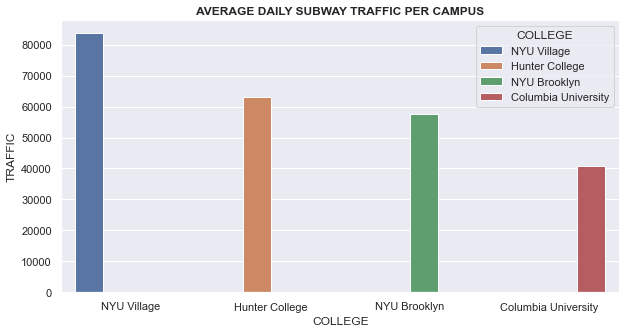

In [593]:
station_daily_campus_avg_sorted_2 = station_daily_campus_avg_sorted.groupby('COLLEGE')['TRAFFIC'].sum().reset_index().sort_values('TRAFFIC', ascending=False)
station_daily_campus_avg_sorted_2

sns.set(rc={"figure.figsize":(15, 5)})


sns.barplot(data=station_daily_campus_avg_sorted_2, x='COLLEGE', y = 'TRAFFIC', hue='COLLEGE').set_title('AVERAGE DAILY SUBWAY TRAFFIC PER CAMPUS', fontweight = 'bold')
plt.xticks(rotation=0)

# plt.text(-0.25, 34500, '34,365', ha='center', va='bottom', size=10)
# plt.text(0.75, 27000, '26,856', ha='center', va='bottom', size=10)
# plt.text(1.75, 22600, '22,423', ha='center', va='bottom', size=10)
# plt.text(2.9, 24300, '24,225', ha='center', va='bottom', size=10)
# plt.text(3.9, 19100, '19,005', ha='center', va='bottom', size=10)
# plt.text(4.9, 14500, '14,358', ha='center', va='bottom', size=10)
# plt.text(6.1, 25400, '25,265', ha='center', va='bottom', size=10)
# plt.text(7.1, 20300, '20,173', ha='center', va='bottom', size=10)
# plt.text(8.1, 17800, '17,739', ha='center', va='bottom', size=10)
# plt.text(9.3, 24700, '24,580', ha='center', va='bottom', size=10)
# plt.text(10.3, 10500, '10,331', ha='center', va='bottom', size=10)
# plt.text(11.3, 5900, '5,875', ha='center', va='bottom', size=10)

#plt.legend(loc='upper right')

plt.show();

In [648]:
station_daily_campus_avg_sorted_2['AVERAGE WEEKLY TRAFFIC'] = station_daily_campus_avg_sorted_2['TRAFFIC'] * 7
station_daily_campus_avg_sorted_2.drop(columns=['WEEKLY AVERAGE', 'WEEKLY AVERAGE TRAFFIC'], inplace=True)
station_daily_campus_avg_sorted_2['POP'] = [52885, 23193, 52884, 31456]
station_daily_campus_avg_sorted_2


,COLLEGE,TRAFFIC,AVERAGE WEEKLY TRAFFIC,POP
3,NYU Village,83644.0,585508.0,52885
1,Hunter College,63177.0,442239.0,23193
2,NYU Brooklyn,57588.0,403116.0,52884
0,Columbia University,40786.0,285502.0,31456


In [650]:
station_daily_campus_avg_sorted_2.sort_values(['POP', 'COLLEGE'], ascending=False)



,COLLEGE,TRAFFIC,AVERAGE WEEKLY TRAFFIC,POP
3,NYU Village,83644.0,585508.0,52885
2,NYU Brooklyn,57588.0,403116.0,52884
0,Columbia University,40786.0,285502.0,31456
1,Hunter College,63177.0,442239.0,23193


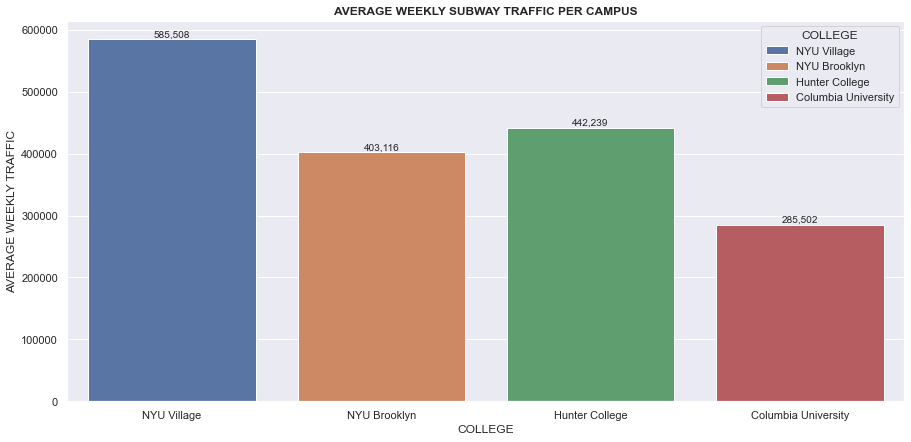

In [657]:
station_daily_campus_avg_sorted_2 = station_daily_campus_avg_sorted_2.sort_values(['COLLEGE', 'AVERAGE WEEKLY TRAFFIC'], ascending=False)


sns.set(rc={"figure.figsize":(15, 7)})

sns.barplot(data=station_daily_campus_avg_sorted_2, x='COLLEGE', y = 'AVERAGE WEEKLY TRAFFIC', hue='COLLEGE', dodge=False).set_title('AVERAGE WEEKLY SUBWAY TRAFFIC PER CAMPUS', fontweight = 'bold')

plt.text(0, 585508, '585,508', ha='center', va='bottom', size=10)
plt.text(1, 403116, '403,116', ha='center', va='bottom', size=10)
plt.text(2, 442239, '442,239', ha='center', va='bottom', size=10)
plt.text(3, 285502, '285,502', ha='center', va='bottom', size=10)

plt.show();

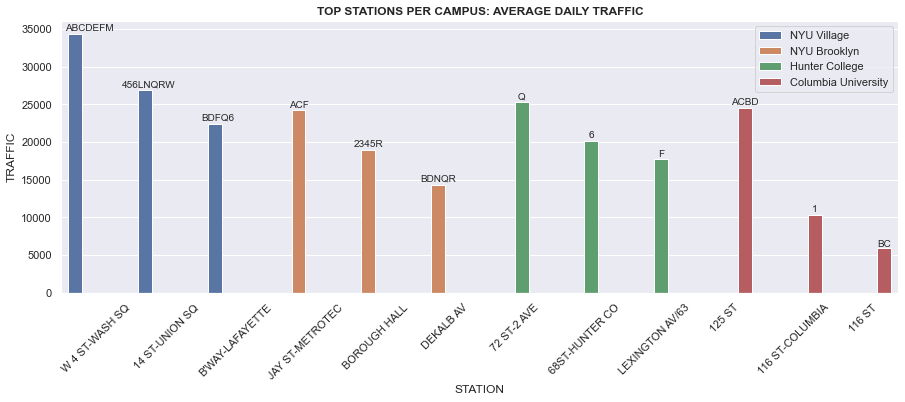

In [573]:
sns.set(rc={"figure.figsize":(15, 5)})


sns.barplot(data=station_daily_campus_avg_sorted, x='STATION', y = 'TRAFFIC', hue='COLLEGE').set_title('TOP STATIONS PER CAMPUS: AVERAGE DAILY TRAFFIC', fontweight = 'bold')
plt.xticks(rotation=45)

plt.text(-0.1, 34500, 'ABCDEFM', ha='center', va='bottom', size=10)
plt.text(0.75, 27000, '456LNQRW', ha='center', va='bottom', size=10)
plt.text(1.75, 22600, 'BDFQ6', ha='center', va='bottom', size=10)
plt.text(2.9, 24300, 'ACF', ha='center', va='bottom', size=10)
plt.text(3.9, 19100, '2345R', ha='center', va='bottom', size=10)
plt.text(4.9, 14500, 'BDNQR', ha='center', va='bottom', size=10)
plt.text(6.1, 25400, 'Q', ha='center', va='bottom', size=10)
plt.text(7.1, 20300, '6', ha='center', va='bottom', size=10)
plt.text(8.1, 17800, 'F', ha='center', va='bottom', size=10)
plt.text(9.3, 24700, 'ACBD', ha='center', va='bottom', size=10)
plt.text(10.3, 10500, '1', ha='center', va='bottom', size=10)
plt.text(11.3, 5900, 'BC', ha='center', va='bottom', size=10)

plt.legend(loc='upper right')


plt.show();

In [562]:
daily_average_total = station_daily_campus_avg['TRAFFIC'].sum() 
weekly_average_total = daily_average_total * 7
monthly_average_total = weekly_average_total * 4

In [563]:
daily_average_total

245195.0

In [566]:
weekly_average_total

1716365.0

In [565]:
monthly_average_total

6865460.0

In [567]:
#If 20% of people notice the ad: 
engage = monthly_average_total * 0.2
engage

1373092.0

In [569]:
#5% will sign up
engage * 0.05

68654.6